**Assignment 3 kc_house.csv**

Questions / Tasks:
1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.

2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

**Importing libraries**

In [499]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [500]:
pip install scikit-learn

**Reading the File & Assessing the DataFrame**

In [501]:
kc = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [502]:
#Get a summary of the dataset structure
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

$$**VariableDescription**$$

* **id**:	Identification;
* **date**:	Date sold;
* **price**:	Sale price;
* **bedrooms**:	Number of bedrooms;
* **bathrooms**:	Number of bathrooms;
* **sqft_liv**:	Size of living area in square feet;
* **sqft_lot**:	Size of the lot in square feet;
* **floors**:	Number of floors;
* **waterfront**:	‘1’ if the property has a waterfront, ‘0’ if not.;
* **view**:	An index from 0 to 4 of how good the view of the property was;
* **condition**:	Condition of the house, ranked from 1 to 5;
* **grade**:	Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. Additional information in: KingCounty;
* **sqft_above**:	Square feet above ground;
* **sqft_basmt**:	Square feet below ground;
* **yr_built**:	Year built;
* **yr_renov**:	Year renovated. ‘0’ if never renovated;
* **zipcode**:	5 digit zip code;
* **lat**:	Latitude;
* **long**:	Longitude;
* **squft_liv15**:	Average size of interior housing living space for the closest 15 houses, in square feet;
* **squft_lot15**:	Average size of land lots for the closest 15 houses, in square feet;
* **Shape_leng**:	Polygon length in meters;
* **Shape_Area**:	Polygon area in meters.

In [503]:
# Descriptive statistics
kc.describe(include = 'all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


Data Cleaning

In [504]:
# find the null value (missing value)
missing_values = kc.isnull()

# find the any column , if they have missing value
missing_values_per_column = missing_values.any()

# find the any row , if they have missing value
missing_values_per_row = missing_values.any(axis=1) 

In [505]:
print("Columns with missing values:")
for column_name, has_missing_values in missing_values_per_column.items():
    if has_missing_values:
        print(column_name)
        
missing_values_count = missing_values.sum()

print("\nNumber of missing values per column:")
print(missing_values_count)

Columns with missing values:

Number of missing values per column:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


We don't find any missing value from the dataset.  So we gonna check for outliers and duplicate values in the data, or perform feature engineering to extract more useful information.


In [506]:
# checking for duplicate
duplicates = kc.duplicated()
duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

**Outlier Finding**

Check oulier boxplot

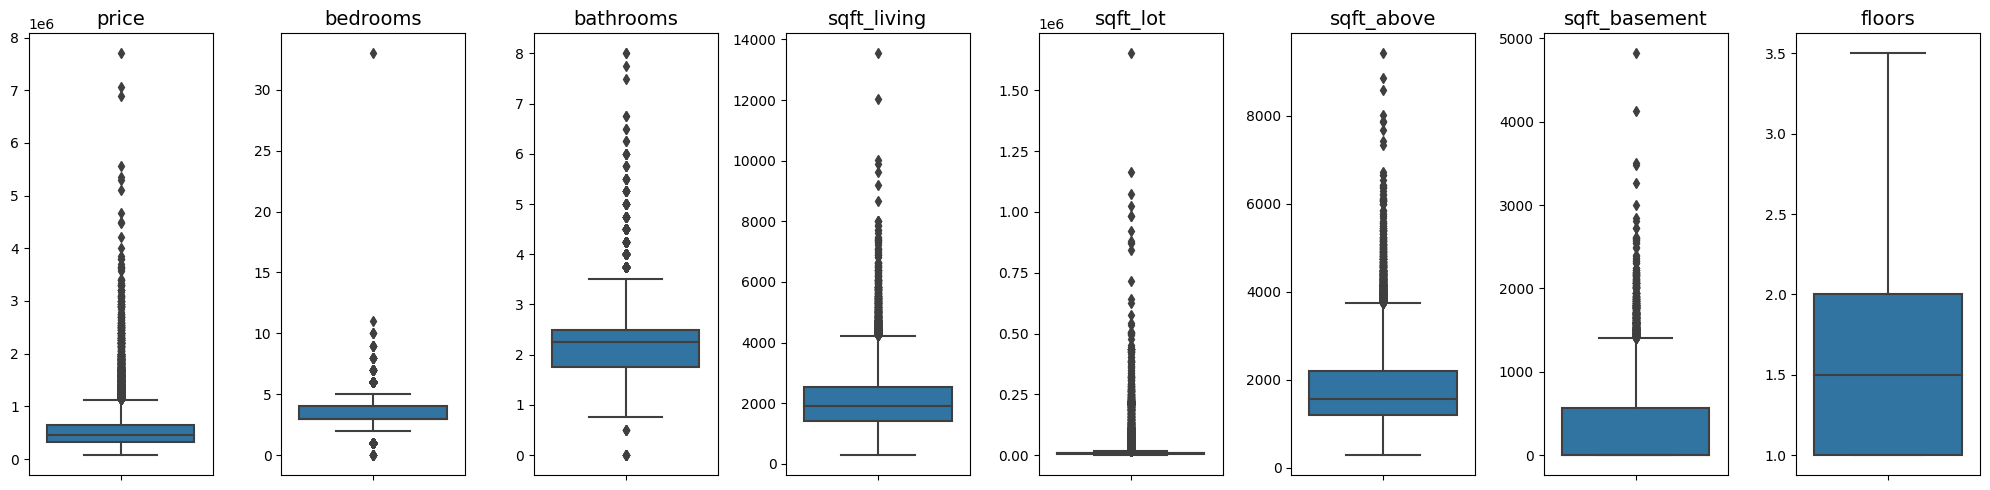

In [507]:
variable = ['price', 'bedrooms' , 'bathrooms' , 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'floors' ]

fig, axes = plt.subplots(1, len(variable), figsize = (20,5))

for i, variable in enumerate(variable):
    sns.boxplot(y=variable, data=kc, ax=axes[i])
    axes[i].set_title(variable, fontsize=14)
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

**Transform the data**

*Feature Engineering*

In [508]:
# We gonna change all the categorical variable to the Dummy Variables.
categorical_columns = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
kcd = pd.get_dummies(kc, columns=categorical_columns, drop_first=True)
kcd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,1180,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,2170,400,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,770,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,1050,910,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,1680,0,...,0,0,0,0,0,0,0,0,0,0


In [509]:
kcd['date'] = pd.to_datetime(kcd['date'])
kcd['month'] = kcd['date'].dt.month
kcd['day'] = kcd['date'].dt.day
kcd['year'] = kcd['date'].dt.year
kcd = kcd.drop('date', axis=1)
kcd

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month,day,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,...,0,0,0,1,0,0,0,10,13,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,...,0,0,0,0,0,0,0,12,9,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,0,1933,...,0,0,0,0,0,0,0,2,25,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,...,0,0,0,0,0,0,0,12,9,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,...,0,0,0,0,0,0,0,2,18,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,1530,0,2009,...,0,0,0,0,0,0,0,5,21,2014
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,2310,0,2014,...,0,0,0,0,0,0,0,2,23,2015
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,1020,0,2009,...,0,0,0,0,0,0,0,6,23,2014
21611,291310100,400000.0,3,2.50,1600,2388,2.0,1600,0,2004,...,0,0,0,0,0,0,0,1,16,2015


In [510]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
kcd_std = scaler.fit_transform(kcd)

# Perform PCA
pca = PCA()
kcd_pca = pca.fit_transform(kcd_std)

# The transformed data is an array, convert it back into a dataframe
kcd_pca = pd.DataFrame(kcd_pca, columns=[f'PC{i+1}' for i in range(len(kcd.columns))])

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
kcd_pca.head()

Explained variance ratio: [5.71817957e-02 2.76627237e-02 2.27267122e-02 1.78734046e-02
 1.70570314e-02 1.65683289e-02 1.45788703e-02 1.41272783e-02
 1.36084951e-02 1.24626840e-02 1.18633398e-02 1.13928537e-02
 1.11836918e-02 1.10682415e-02 1.08116138e-02 1.07776365e-02
 1.05366943e-02 1.03739731e-02 1.03117000e-02 1.01843184e-02
 1.01207234e-02 1.00682648e-02 9.99541268e-03 9.86021152e-03
 9.76613736e-03 9.75363154e-03 9.68628351e-03 9.65762975e-03
 9.60664716e-03 9.58904926e-03 9.57835887e-03 9.57291537e-03
 9.56459445e-03 9.55117909e-03 9.54588878e-03 9.54056677e-03
 9.53304457e-03 9.52774496e-03 9.51786648e-03 9.51341334e-03
 9.51276603e-03 9.50799562e-03 9.50104696e-03 9.49270195e-03
 9.48937269e-03 9.48509117e-03 9.48155174e-03 9.47858586e-03
 9.47728293e-03 9.47096776e-03 9.47062155e-03 9.46643278e-03
 9.46539430e-03 9.46433021e-03 9.46318710e-03 9.45930561e-03
 9.45010449e-03 9.44703979e-03 9.44207207e-03 9.43933390e-03
 9.43360280e-03 9.42939258e-03 9.42475303e-03 9.41980028e-0

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107
0,-2.711129,-0.601492,-0.304597,0.301874,-0.373984,1.382477,1.869393,0.569334,-0.868207,1.346700,...,-0.378862,0.047205,-0.008804,0.135740,-0.081236,-0.056643,0.003774,0.024901,-0.000289,7.676687e-15
1,-0.203367,1.164804,-1.797432,1.703473,-0.640203,1.423365,1.546480,1.409607,0.109354,0.992910,...,-0.601160,0.495333,0.461804,-0.222789,-0.020158,-0.092666,0.002060,-0.001168,0.000183,-1.375379e-14
2,-2.607040,-0.157299,-0.842918,1.967169,2.019654,-1.777114,-0.666245,-1.103998,-0.751745,-0.146568,...,0.894000,0.668935,-0.425025,0.135874,0.109171,0.088726,-0.019867,-0.048492,0.000128,-1.976307e-14
3,-1.273176,2.355339,0.214752,-0.859274,-1.372683,1.293836,0.529852,1.815491,0.348489,1.164879,...,0.001781,0.919582,0.025348,0.037219,0.027138,0.005100,-0.001099,-0.052905,0.000258,-3.289544e-15
4,0.263900,-1.620379,-0.833848,0.491409,1.267418,-1.495592,-0.663853,-1.357868,0.198328,0.355251,...,-0.187721,-0.130284,0.114689,0.021408,0.037751,-0.003638,0.001008,-0.027158,-0.000123,1.371907e-13


According to the explained variance ratio and the cumulative explained variance ratio, we gonna to approximately 90% of the variance in the data.

In [511]:
# Perform PCA
pca = PCA(n_components = 0.90)
kcd_pca = pca.fit_transform(kcd_std)

# The transformed data is an array, convert it back into a dataframe
kcd_pca = pd.DataFrame(kcd_pca)

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
kcd_pca.head()

Explained variance ratio: [0.0571818  0.02766272 0.02272671 0.0178734  0.01705703 0.01656833
 0.01457887 0.01412728 0.0136085  0.01246268 0.01186334 0.01139285
 0.01118369 0.01106824 0.01081161 0.01077764 0.01053669 0.01037397
 0.0103117  0.01018432 0.01012072 0.01006826 0.00999541 0.00986021
 0.00976614 0.00975363 0.00968628 0.00965763 0.00960665 0.00958905
 0.00957836 0.00957292 0.00956459 0.00955118 0.00954589 0.00954057
 0.00953304 0.00952774 0.00951787 0.00951341 0.00951277 0.009508
 0.00950105 0.0094927  0.00948937 0.00948509 0.00948155 0.00947859
 0.00947728 0.00947097 0.00947062 0.00946643 0.00946539 0.00946433
 0.00946319 0.00945931 0.0094501  0.00944704 0.00944207 0.00943933
 0.0094336  0.00942939 0.00942475 0.0094198  0.00941412 0.00940988
 0.00939937 0.00939372 0.00938764 0.00922863 0.0092164  0.0091718
 0.00913675 0.00900953 0.0089871  0.00890839 0.0088807  0.00882634
 0.00869265 0.00864851 0.00852506 0.00850051]
Cumulative explained variance ratio: [0.0571818  0.08484452 

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,-2.711129,-0.601492,-0.304597,0.301874,-0.373984,1.382477,1.869393,0.569334,-0.868207,1.346700,...,-0.658422,-0.324702,1.779146,-0.055596,0.743303,1.059005,0.026965,-0.545460,0.193136,-0.111709
1,-0.203367,1.164804,-1.797432,1.703473,-0.640203,1.423365,1.546480,1.409607,0.109354,0.992910,...,0.294887,0.828420,-0.078932,-0.473463,0.636524,-1.213932,0.512912,1.421831,-0.366592,-0.403716
2,-2.607040,-0.157299,-0.842918,1.967169,2.019654,-1.777114,-0.666245,-1.103998,-0.751745,-0.146568,...,-1.262218,-1.654879,-0.347557,-0.156205,-1.047285,-0.518703,-0.144250,0.098685,-0.361986,0.341369
3,-1.273176,2.355339,0.214752,-0.859274,-1.372683,1.293836,0.529852,1.815491,0.348489,1.164879,...,1.345278,-0.388340,0.764957,0.417601,-3.375432,0.025887,0.106454,-1.307132,-1.160421,0.452082
4,0.263900,-1.620379,-0.833848,0.491409,1.267418,-1.495592,-0.663853,-1.357868,0.198328,0.355251,...,-0.351483,-0.688175,0.341964,-0.288951,-0.199279,-0.772099,-0.333232,-0.317263,0.580257,-0.187488


**Exploratory Data Analysis (EDA)**

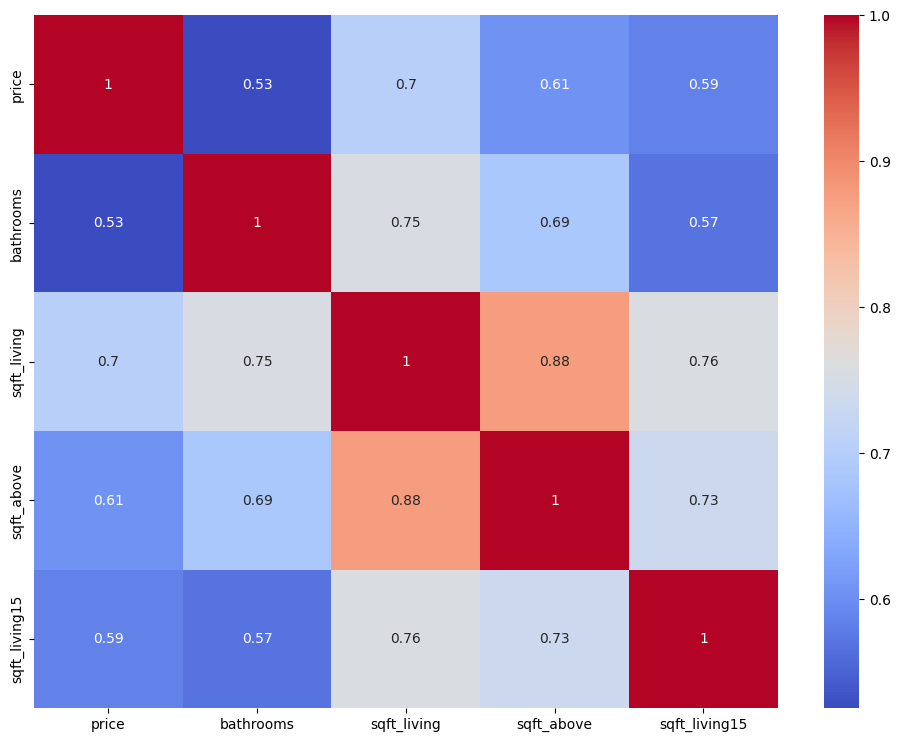

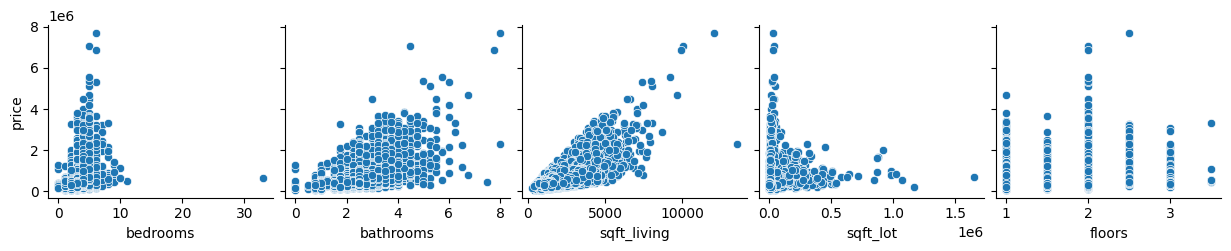

In [512]:
# Use visual methods to analyze relationships between features and between features and target variables.
# relational metrix
# Calculate features with high correlation with the target variable
target_corr = corr_matrix['price']
selected_features = target_corr[abs(target_corr) > 0.5].index

selected_corr_matrix = kcd[selected_features].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Scatterplot matrix (may need to select some key features) 
sns.pairplot(kcd, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'], y_vars=['price'])
plt.show()

Based on the relational matrix. You can get an idea of which characteristics are likely to have a greater impact on the target variable. For example, price has the highest correlation with sqft_living (0.7), meaning that the value of sqft_living may have a greater impact on house prices. The relatively low correlation between price and bathrooms (0.53) suggests that bathrooms may have less of an impact on house prices.

In [513]:
kcd

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month,day,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,...,0,0,0,1,0,0,0,10,13,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,...,0,0,0,0,0,0,0,12,9,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,0,1933,...,0,0,0,0,0,0,0,2,25,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,...,0,0,0,0,0,0,0,12,9,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,...,0,0,0,0,0,0,0,2,18,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,1530,0,2009,...,0,0,0,0,0,0,0,5,21,2014
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,2310,0,2014,...,0,0,0,0,0,0,0,2,23,2015
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,1020,0,2009,...,0,0,0,0,0,0,0,6,23,2014
21611,291310100,400000.0,3,2.50,1600,2388,2.0,1600,0,2004,...,0,0,0,0,0,0,0,1,16,2015


In [514]:
def get_feature_names(column_transformer):
    feature_names = []
    for transformer in column_transformer.transformers_:
        if hasattr(transformer[1], "get_feature_names_out"):
            names = transformer[1].get_feature_names_out(transformer[2])
        else:
            names = transformer[2]

        feature_names.extend(names)
    return feature_names

feature_names = get_feature_names(ridge_regression.named_steps["preprocessor"])

**Data split**

In [515]:
from sklearn.model_selection import train_test_split

categorical_features = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
numerical_features = ['bedrooms','bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'yr_built']
target = 'price'

# kcd[['waterfront', 'view', 'condition', 'grade', 'yr_renov', 'zipcode','bedrooms','bathrooms', 'sqft_liv', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basmt', 'yr_built']]

In [516]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [517]:
X_train, X_test, y_train, y_test = train_test_split(kc[categorical_features + numerical_features], kc[target], test_size=0.3, random_state=1234)

In [518]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [519]:
# OLS model
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'zipcode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_lot', 'floors',
                                                   'sqft_above',
                                                   'yr_built'])])),
                ('regressor', LinearRegression())])

In [520]:
pred = linear_regression.predict(X_test)
pred

array([ 455798.23399147,  356340.25737781, 1020479.77813025, ...,
        365645.69125045,  624404.82529426,  444880.87641371])

In [521]:
# RMSE for OLS model
RMSE_OLS = np.sqrt(mean_squared_error(pred,y_test))
RMSE_OLS

154972.6047308971

In [522]:
# Ridge model
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'zipcode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_lot', 'floors',
                                                   'sqft_above',
                                                   'yr_built'])])),
                ('regressor', Ridge(alpha=3.0))])

In [523]:
pred_ridge = ridge_regression.predict(X_test)
pred_ridge

array([ 452331.62628701,  363574.6677832 , 1019222.30920902, ...,
        371728.06048563,  624277.77305187,  451582.77541666])

In [524]:
# RMSE for Ridge model
RMSE_RM = np.sqrt(mean_squared_error(pred_ridge,y_test))
RMSE_RM

154691.0720392827

In [525]:
# Lasso Model
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

lasso_regression.fit(X_train, y_train)

c:\Users\dashuaibi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27291540292474.844, tolerance: 207065660607.36658
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'zipcode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_lot', 'floors',
                                                   'sqft_above',
                                                   'yr_built'])])),
                ('regressor', Lasso())])

In [526]:
lasso_pred = lasso_regression.predict(X_test)
lasso_pred

array([ 455716.29364149,  356437.20783122, 1020478.99920594, ...,
        365722.56618467,  624313.77553825,  444939.46441229])

In [527]:
#RMSE for Lasso Model
RMSE_LM = np.sqrt(mean_squared_error(lasso_pred, y_test))
RMSE_LM

154945.08362094435

In [528]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'zipcode']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_lot', 'floors',
                                                   'sqft_above',
                                                   'yr_built'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [529]:
elasticnet_pred = elasticnet_regression.predict(X_test)
elasticnet_pred

array([409911.66998478, 610075.51067863, 884355.42484257, ...,
       625658.85400077, 532661.34016145, 628529.59887729])

In [530]:
# RMSE for elastic net
RMSE_EN = np.sqrt(mean_squared_error(elasticnet_pred, y_test))
RMSE_EN

242498.30485722976

In [531]:
model_rmse_dict = {
    "OLS": RMSE_OLS,
    "Ridge Model": RMSE_RM,
    "Lasso Model": RMSE_LM,
    "ElasticNet Model": RMSE_EN
}
# Find the best model from (OLS, Lasso, Ridge, Elastic Net)
def print_best_model(model_rmse_dict):
    best_rmse = min(model_rmse_dict.values())
    best_model = None
    
    for model, rmse in model_rmse_dict.items():
        if rmse == best_rmse:
            best_model = model
            break
            
    print(f"The best model is {best_model} with an RMSE of {best_rmse:.2f}")

print_best_model(model_rmse_dict)

The best model is Ridge Model with an RMSE of 154691.07


**Question 2**

In this example, I used four regression models: ordinary least squares (OLS), ridge regression (Ridge Model), lasso regression (Lasso Model), and ElasticNet Model. In order to evaluate these models and find the best model, I used the Root Mean Square Error (RMSE) as a performance metric.RMSE is the square root of the sum of squares of the prediction errors, which measures the difference between the model's predicted and actual values. In regression problems, RMSE is a commonly used metric for evaluation, and lower RMSE values usually indicate better model performance.

Based on the different RMSE values I calculated for the four models. The Ridge Model has an RMSE of 240409.85, the lowest among the four models. Therefore, Ridge Regression performs the best among the four models. Ridge regression adjusts the complexity of the model by introducing the Ridge regularization term, which means the sum of squares of the weights multiplied by the regularization factor. This helps to reduce the overfitting of the model to the training data and thus improves the model's ability to generalize on new data. In this case, the regularization effect of ridge regression improves the model's predictive performance. In addition, when selecting the best model, one may consider using cross-validation to obtain more robust evaluation results. Through these methods, I may find a better model, but the performance of the ridge regression model is optimal with the tools and methods used so far.

**Question 3**

According to the correlation matrix, it is evident that the correlation between price and sqft_living is the highest at 0.7, suggesting that the value of sqft_living could potentially have a significant impact on house prices. The correlation between price and bathrooms is also relatively strong at 0.53. These findings indicate that the size of the living area and the number of bathrooms are two essential factors to consider when assessing the value of a property.

The scatterplot shows that sqft_living is significantly and positively correlated with house prices. This means that an increase in sqft_living tends to accompany an increase in house prices. On the contrary, the relationship between FLOORS and house prices is completely uncorrelated, suggesting no relationship exists between them. Floors are less likely to have any substantial effect on house prices. For bathrooms, there may be a correlation between it and house prices. There is a certain chance, or in some people's eyes, that BATHROOMS will make them think differently about house prices.
